In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
#          '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
#          '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
#          '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
#          '#222222', '#f2f3f4']

In [2]:
# make some adjustment of the plotting

mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 1
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.dpi'] = 100

In [3]:
# load the genotype data
sample_genotype = pd.read_csv('1kg_genotype_matrix.tsv', sep = '\t', index_col = 0)

# load the metadata
# there are some emtpy columns at the end of each line, that's why usecols=[0,1,2,3]
sample_info = pd.read_csv('1kg_phase3_release_20130502_vcf/integrated_call_samples_v3.20130502.ALL.panel',
                          sep = '\t', index_col = 0, usecols=[0,1,2,3])

# make sure the orders of samples are the same between sample_genotype and sample_info
sample_info = sample_info.loc[sample_genotype.columns, :]

In [4]:
sample_genotype.head(2)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
ID,,,,,,,,,,,,,,,,,,,,,
rs826472,2,2,0,1,0,2,0,1,2,1,...,2,2,1,2,2,2,2,1,2,1
rs735155,0,2,0,0,0,2,1,0,0,2,...,1,2,2,2,1,2,2,2,2,0


In [5]:
sample_info.head(2)

,pop,super_pop,gender
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female


In [6]:
# The data in our matrix is limited to 0,1,2 which are fairly close
# so we don't really need to scale them
# note all scikit-learn packakges assume you have sample by feature matrix, hence sample_genotype.T

pca = PCA(n_components=2)
pca.fit(sample_genotype.T)
X_r = pca.transform(sample_genotype.T)
sample_info['PC1'] = X_r[:, 0]
sample_info['PC2'] = X_r[:, 1]

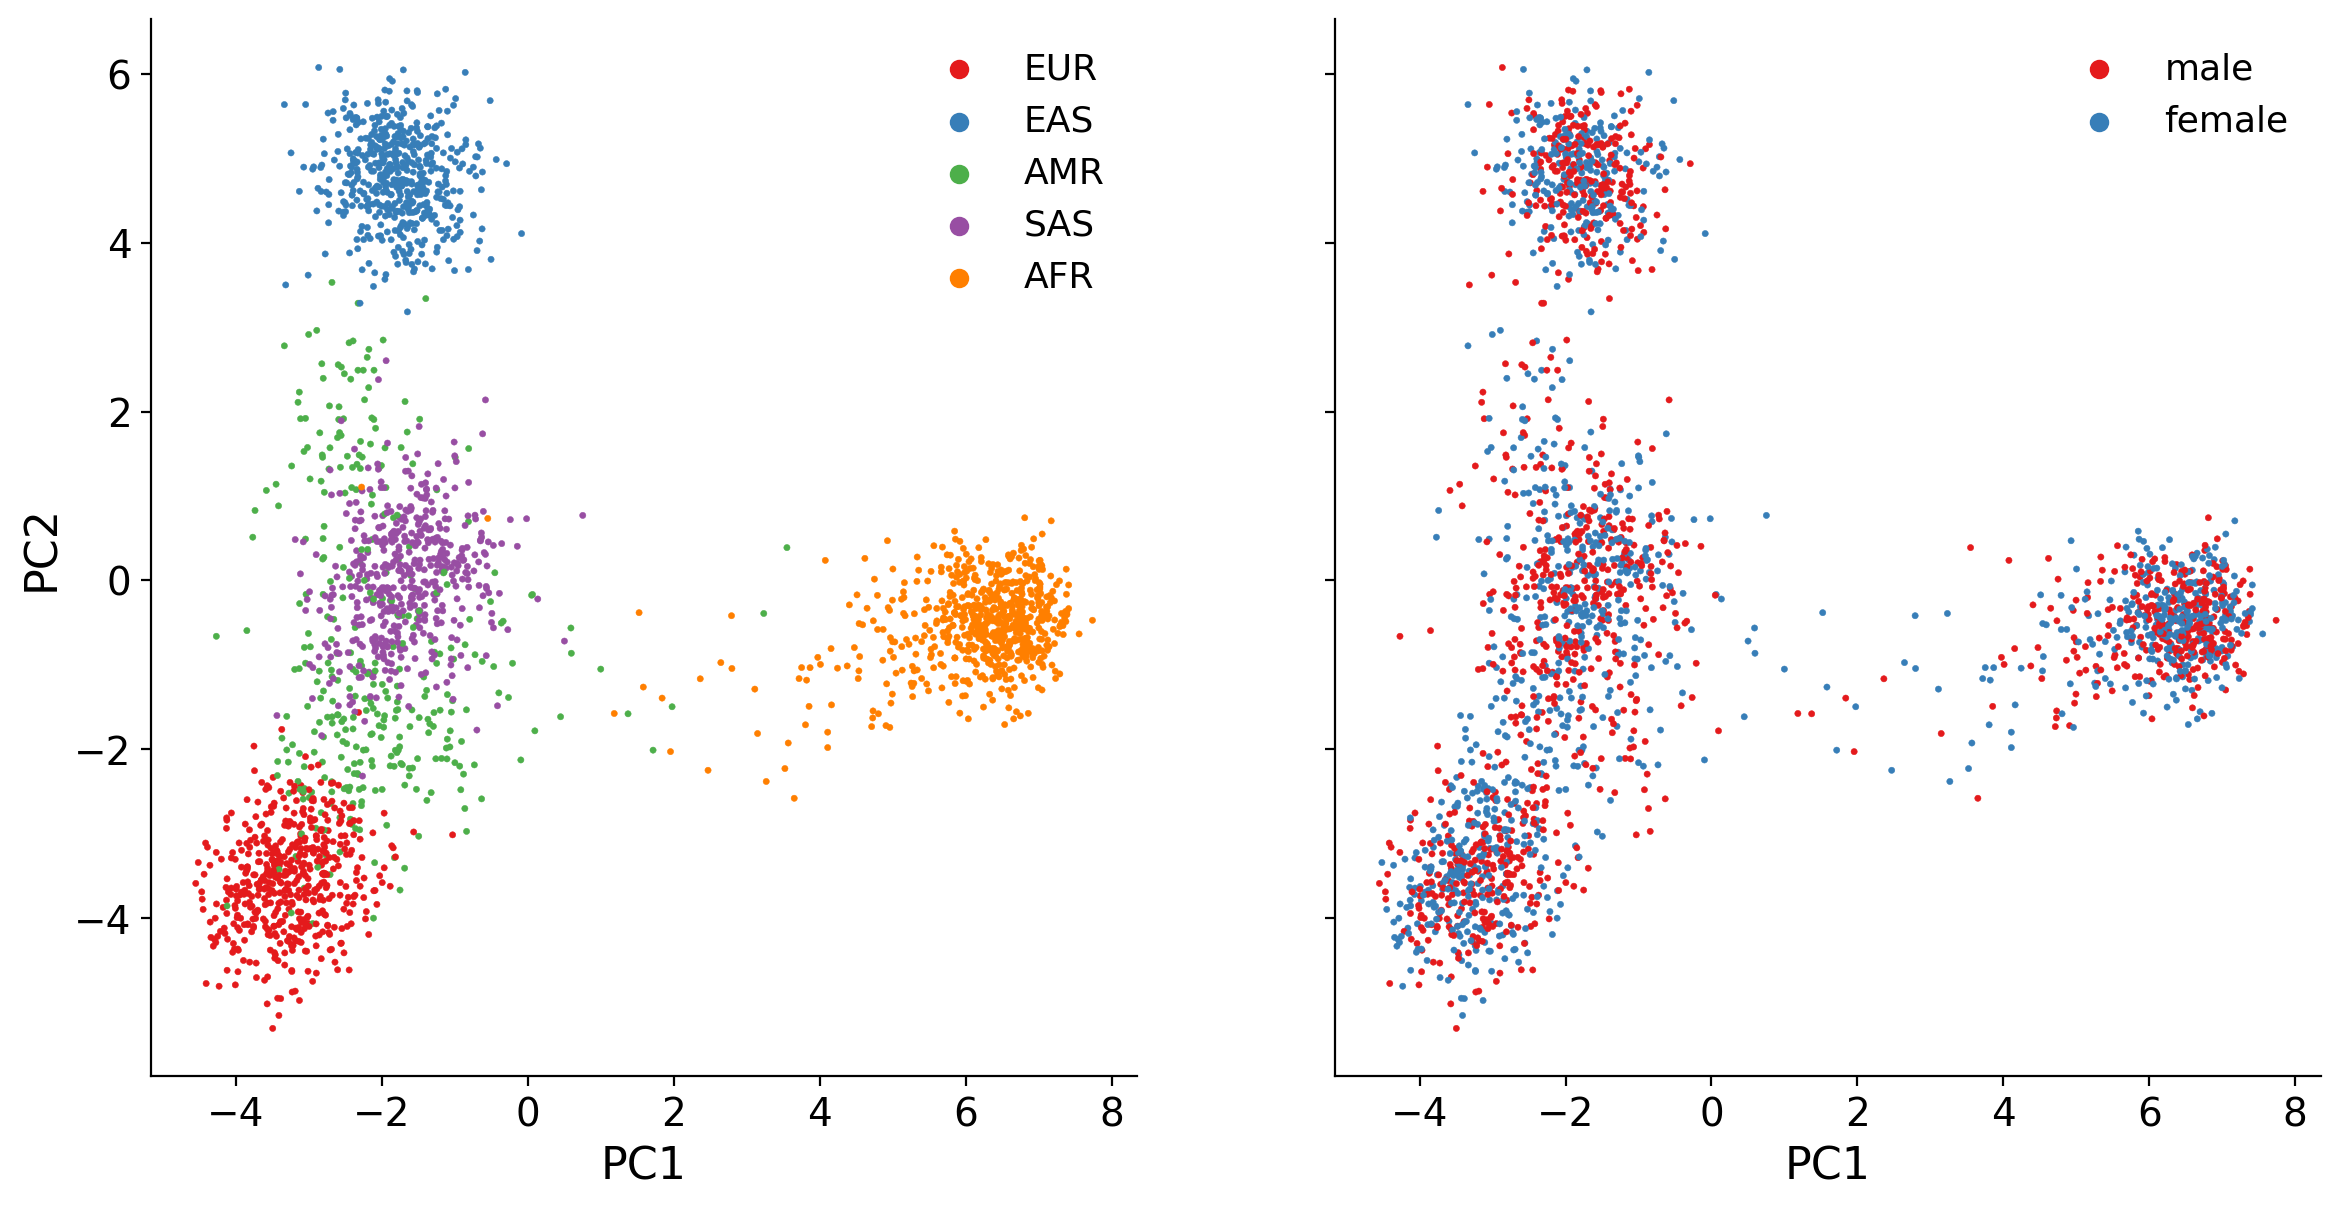

In [7]:
fig, axs = plt.subplots(figsize = (14,7), ncols=2, sharex=True, sharey=True)

sns.scatterplot(data = sample_info, x = 'PC1', y = 'PC2', hue = 'super_pop',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[0])
sns.scatterplot(data = sample_info, x = 'PC1', y = 'PC2', hue = 'gender',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[1])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(title='', frameon = False)

plt.savefig('PCA_by_superpop_gender.pdf', bbox_inches = 'tight')

In [8]:
# now let's have a look at the loading of each feature on PC1
# sort them (smallest to largest)

# the result indicates that the 67th feature contributes the most to the negative side (non-AFR)
# the 78th feature contributes the most to the positive side (AFR)

pca.components_[0, :].argsort()

array([ 67,  68, 122,  61,  76, 185, 109,  25,  22,  47,  34, 155,  26,
        73, 177, 115,  30,   3, 156,  33,  50, 113, 144,  52,  41, 112,
         1, 166, 117,   8,  23, 116, 120, 119, 192,  85,  81,  55,  14,
        77,  97,  18, 105,  88, 165,  82,  38, 160, 142, 108,  10, 182,
        65,  15,  80, 152,  31,  59, 153, 179,   5, 136,  48, 134, 197,
       189,  69,  39,  11,  53, 131, 132, 162, 146, 183,  21, 118, 130,
        12, 173,  74, 172,  46, 129,  51, 104, 188,  87,  64, 114,  98,
         7,  28,  43,  17,  42, 164,  72, 198,  49,  16,  40,  20,  37,
        32, 110,  79,  13, 184,  60, 123,  89,  94, 127,  86, 181,  71,
        75,  63,  57,  56, 167, 170, 100, 171, 149, 126, 154,   4,   6,
        90, 135, 141, 174,   2, 163, 194, 176, 169, 148,  84, 193, 133,
       150,  62, 111,  66, 161,  24,  54, 102, 128,  35, 138, 157, 159,
       151,  91,  83, 158,  70, 145,   0, 125, 101,  29, 140, 139, 195,
       137,  36, 121, 180, 103, 106, 124, 187, 178,   9, 191, 14

In [9]:
# look at what are they

print(sample_genotype.index[67])
print(sample_genotype.index[78])

rs3916235
rs2814778


In [10]:
# add the value to the sample_info so that we could plot them

sample_info['rs3916235'] = sample_genotype.loc['rs3916235',].astype(str)
sample_info['rs2814778'] = sample_genotype.loc['rs2814778',].astype(str)

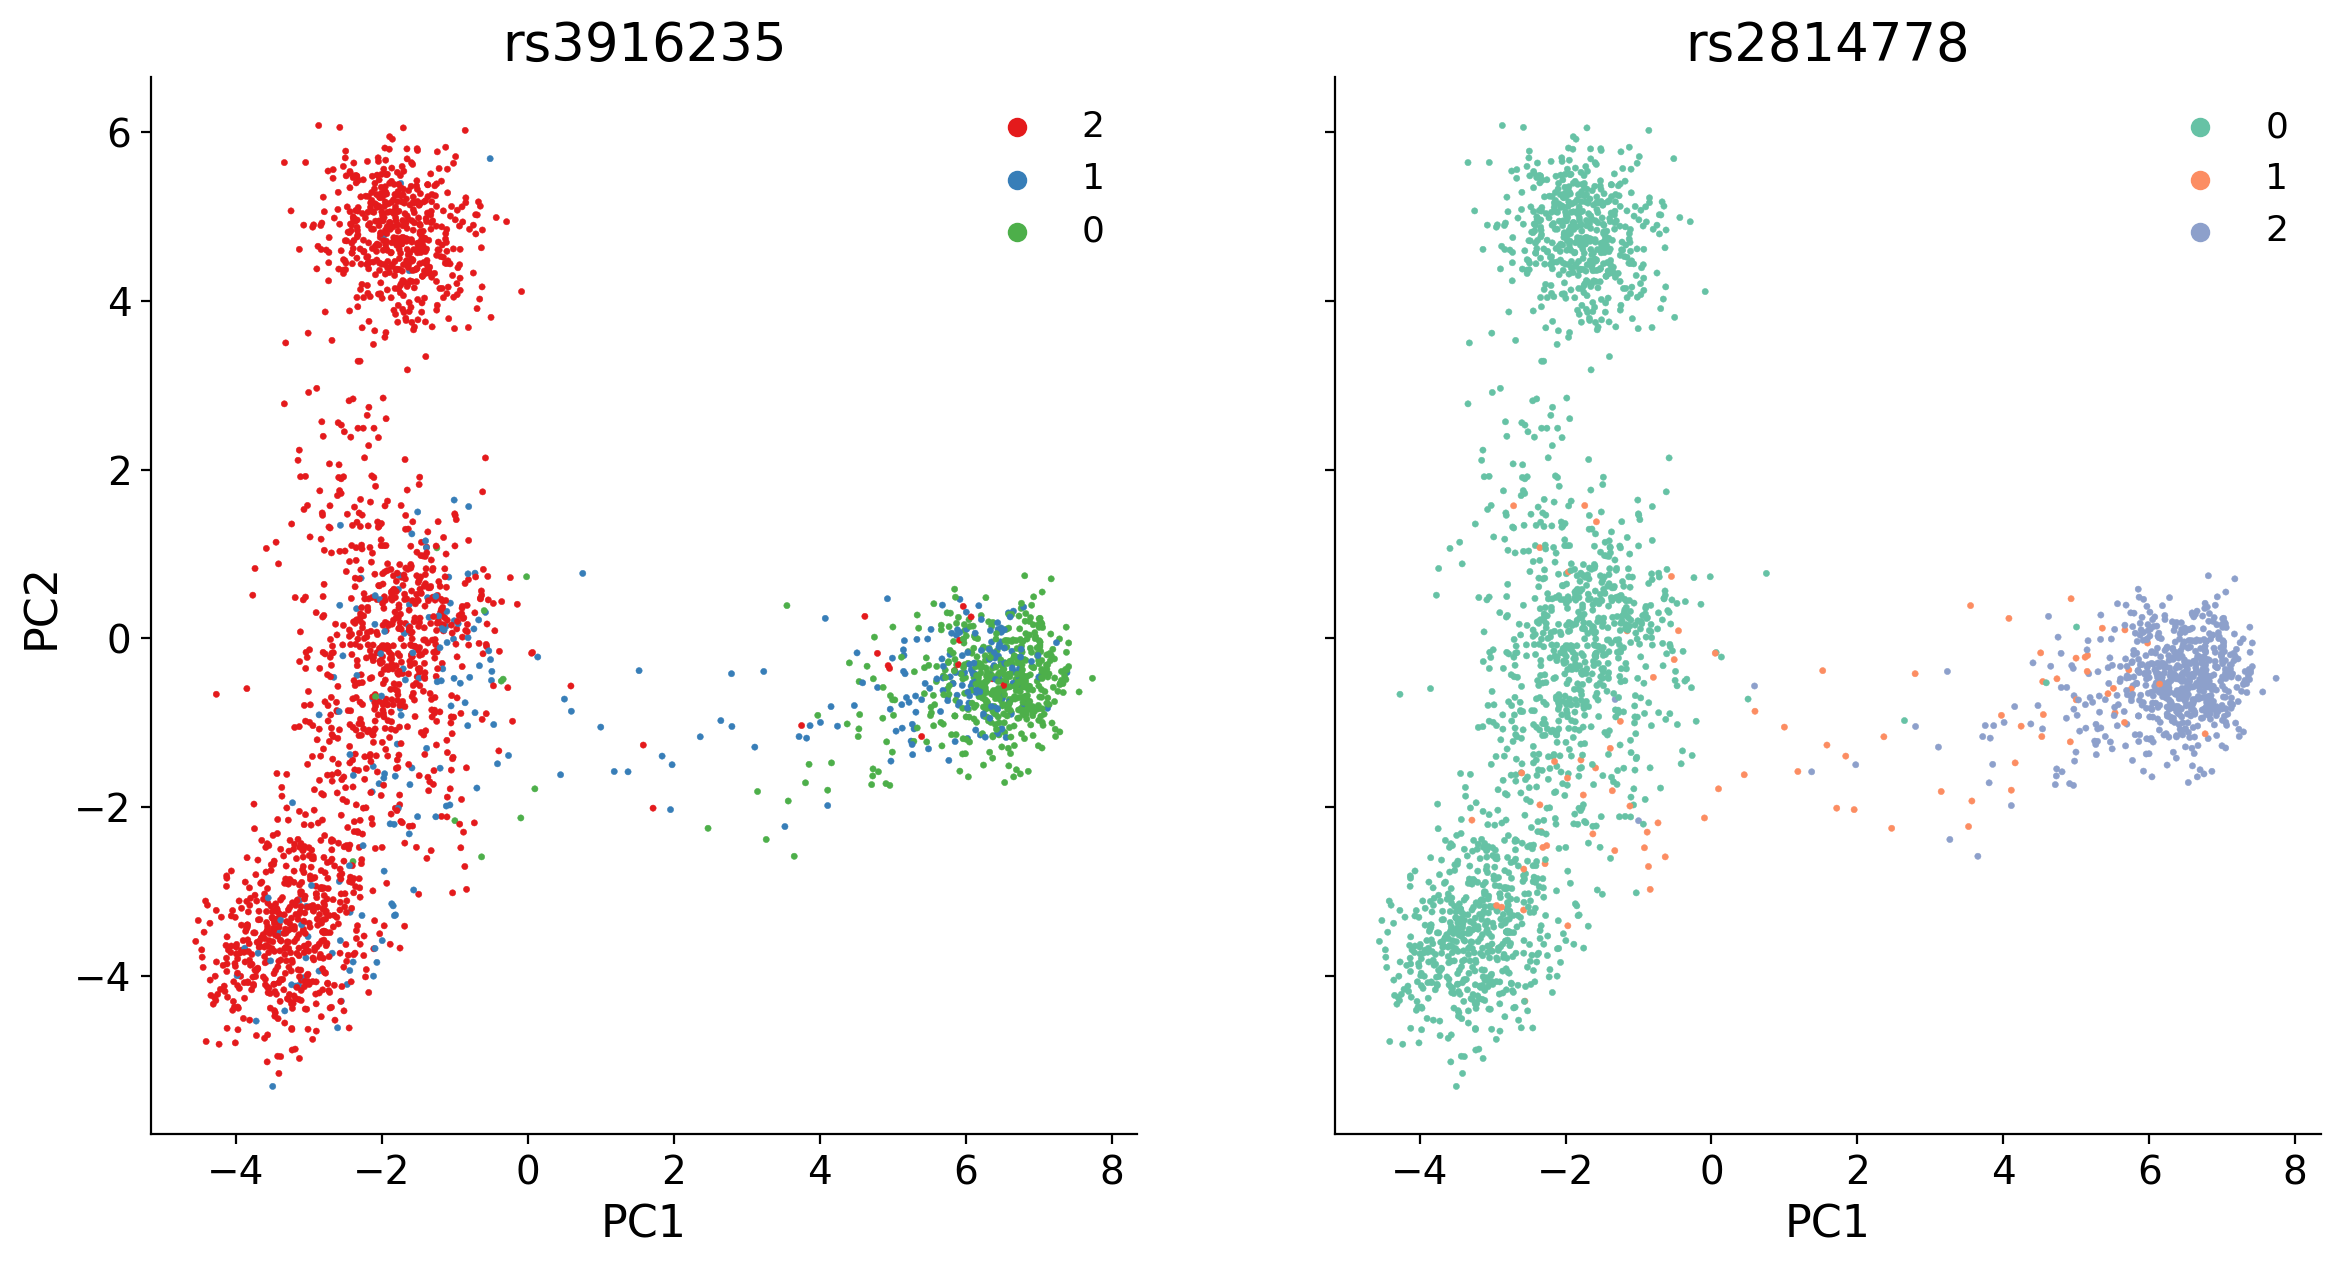

In [11]:
fig, axs = plt.subplots(figsize = (14,7), ncols=2, sharex=True, sharey=True)

sns.scatterplot(data = sample_info, x = 'PC1', y = 'PC2', hue = 'rs3916235',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[0])
sns.scatterplot(data = sample_info, x = 'PC1', y = 'PC2', hue = 'rs2814778',
                edgecolor = None, palette = 'Set2', s = 5, ax = axs[1])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(title='', frameon = False)

axs[0].set_title('rs3916235')
axs[1].set_title('rs2814778')
    
plt.savefig('PCA_by_SNVs.pdf', bbox_inches = 'tight')

In [12]:
# we could also use tSNE to have a look

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            random_state=42,
            init='pca',
            verbose=1).fit_transform(sample_genotype.T)

sample_info['tSNE_1'] = tsne[:, 0]
sample_info['tSNE_2'] = tsne[:, 1]

/Users/xichen/miniconda3/envs/scs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2504 samples in 0.000s...
[t-SNE] Computed neighbors for 2504 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2504
[t-SNE] Computed conditional probabilities for sample 2000 / 2504
[t-SNE] Computed conditional probabilities for sample 2504 / 2504

/Users/xichen/miniconda3/envs/scs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(



[t-SNE] Mean sigma: 2.164615
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.671860
[t-SNE] KL divergence after 1000 iterations: 2.307062


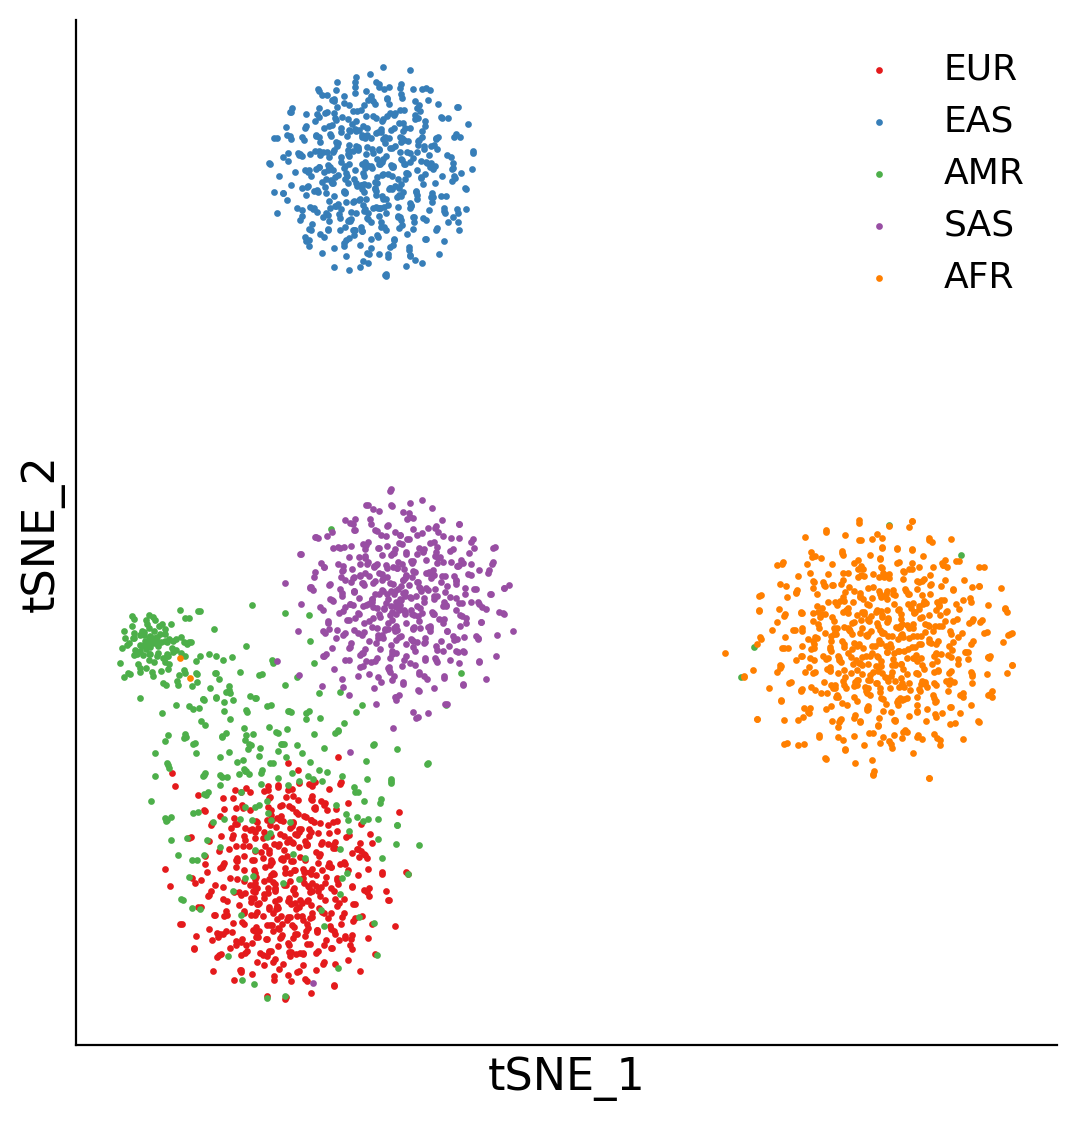

In [13]:
g = sns.FacetGrid(sample_info, hue='super_pop', height=6, palette='Set1')
g.map(plt.scatter, 'tSNE_1', 'tSNE_2', s=2, rasterized=True)

g.ax.tick_params(left=False, bottom=False)
g.ax.set_xticks([])
g.ax.set_yticks([])

g.ax.legend(frameon = False)
plt.show()